In [1]:
import pandas as pd 
from matplotlib import pyplot as plt
import seaborn as sns 

df = pd.read_csv('D:/Online_Retail_Data_Set/OnlineRetail.csv', encoding='latin1')

In [ ]:
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850.0,United Kingdom


In [3]:
print("Dataset shape:", df.shape)

Dataset shape: (541909, 8)


In [4]:
df.describe()

,Quantity,UnitPrice,CustomerID
count,541909.000000,541909.000000,406829.000000
mean,9.552250,4.611114,15287.690570
std,218.081158,96.759853,1713.600303
min,-80995.000000,-11062.060000,12346.000000
25%,1.000000,1.250000,13953.000000
50%,3.000000,2.080000,15152.000000
75%,10.000000,4.130000,16791.000000
max,80995.000000,38970.000000,18287.000000


In [5]:
df.info()
print('Rows:{}'.format(df.shape[0]))

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   InvoiceNo    541909 non-null  object 
 1   StockCode    541909 non-null  object 
 2   Description  540455 non-null  object 
 3   Quantity     541909 non-null  int64  
 4   InvoiceDate  541909 non-null  object 
 5   UnitPrice    541909 non-null  float64
 6   CustomerID   406829 non-null  float64
 7   Country      541909 non-null  object 
dtypes: float64(2), int64(1), object(5)
memory usage: 33.1+ MB
Rows:541909


In [6]:
for column in df.columns:
    unique_values = df[column].nunique()
    print(f"Unique values in {column}: {unique_values}")

Unique values in InvoiceNo: 25900
Unique values in StockCode: 4070
Unique values in Description: 4223
Unique values in Quantity: 722
Unique values in InvoiceDate: 23260
Unique values in UnitPrice: 1630
Unique values in CustomerID: 4372
Unique values in Country: 38


In [7]:
df.isna().sum()

InvoiceNo           0
StockCode           0
Description      1454
Quantity            0
InvoiceDate         0
UnitPrice           0
CustomerID     135080
Country             0
dtype: int64

In [8]:
print(" DUPLICATED VALUES ".center(125,'-'))
print(df.duplicated().sum())

----------------------------------------------------- DUPLICATED VALUES -----------------------------------------------------
5268


In [40]:
df['CustomerID'].nunique()

4339

In [46]:
num_duplicates = sum(df['CustomerID'].duplicated())
print(num_duplicates)

523047


In [52]:
df = df.drop_duplicates(subset=['CustomerID'], keep='first')

In [58]:
df['CustomerID'].isna().sum()

1

In [60]:
df = df.dropna(subset=['CustomerID'])

In [62]:
df['CustomerID'] = df['CustomerID'].astype(int)
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 4339 entries, 0 to 541768
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   InvoiceNo    4339 non-null   int32  
 1   StockCode    4339 non-null   object 
 2   Description  4339 non-null   object 
 3   Quantity     4339 non-null   int64  
 4   InvoiceDate  4339 non-null   object 
 5   UnitPrice    4339 non-null   float64
 6   CustomerID   4339 non-null   int32  
 7   Country      4339 non-null   object 
dtypes: float64(1), int32(2), int64(1), object(4)
memory usage: 271.2+ KB


In [18]:
rows_with_na = df[df.isna().any(axis=1)]
print(rows_with_na)

       InvoiceNo StockCode                      Description  Quantity  \
622       536414     22139                              NaN        56   
1443      536544     21773  DECORATIVE ROSE BATHROOM BOTTLE         1   
1444      536544     21774  DECORATIVE CATS BATHROOM BOTTLE         2   
1445      536544     21786               POLKADOT RAIN HAT          4   
1446      536544     21787            RAIN PONCHO RETROSPOT         2   
...          ...       ...                              ...       ...   
541536    581498    85099B          JUMBO BAG RED RETROSPOT         5   
541537    581498    85099C   JUMBO  BAG BAROQUE BLACK WHITE         4   
541538    581498     85150    LADIES & GENTLEMEN METAL SIGN         1   
541539    581498     85174                S/4 CACTI CANDLES         1   
541540    581498       DOT                   DOTCOM POSTAGE         1   

            InvoiceDate  UnitPrice  CustomerID         Country  
622     12/1/2010 11:52       0.00         NaN  United Kin

In [20]:
df['Description'] = df['Description'].fillna(0)
df.isna().sum()

InvoiceNo           0
StockCode           0
Description         0
Quantity            0
InvoiceDate         0
UnitPrice           0
CustomerID     135080
Country             0
dtype: int64

In [22]:
df.loc[622]

InvoiceNo               536414
StockCode                22139
Description                  0
Quantity                    56
InvoiceDate    12/1/2010 11:52
UnitPrice                  0.0
CustomerID                 NaN
Country         United Kingdom
Name: 622, dtype: object

In [24]:
df = df[~df.InvoiceNo.str.contains('C',na=False)]

In [28]:
df = df[~df.InvoiceNo.str.contains('A',na=False)]

In [30]:
df['InvoiceNo'] = df['InvoiceNo'].astype(int)
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 532618 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   InvoiceNo    532618 non-null  int32  
 1   StockCode    532618 non-null  object 
 2   Description  532618 non-null  object 
 3   Quantity     532618 non-null  int64  
 4   InvoiceDate  532618 non-null  object 
 5   UnitPrice    532618 non-null  float64
 6   CustomerID   397924 non-null  float64
 7   Country      532618 non-null  object 
dtypes: float64(2), int32(1), int64(1), object(4)
memory usage: 34.5+ MB


In [32]:
df['InvoiceNo'].nunique()

22061

In [64]:
df = df.drop_duplicates(keep="first")
print("Number of duplicates after cleaning:",df.duplicated().sum())

Number of duplicates after cleaning: 0


In [75]:
print("Negative value in Quantity is:",(df.Quantity<0).sum())
print("Negative value in Price is:",(df.UnitPrice<0).sum())

Negative value in Quantity is: 0
Negative value in Price is: 0


In [87]:
df["Revenue"] = df["Quantity"] * df["UnitPrice"]

In [89]:
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Revenue
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850,United Kingdom,15.30
9,536367,84879,ASSORTED COLOUR BIRD ORNAMENT,32,12/1/2010 8:34,1.69,13047,United Kingdom,54.08
26,536370,22728,ALARM CLOCK BAKELIKE PINK,24,12/1/2010 8:45,3.75,12583,France,90.00
46,536371,22086,PAPER CHAIN KIT 50'S CHRISTMAS,80,12/1/2010 9:00,2.55,13748,United Kingdom,204.00
65,536374,21258,VICTORIAN SEWING BOX LARGE,32,12/1/2010 9:09,10.95,15100,United Kingdom,350.40


In [175]:
df['InvoiceMonth'] = pd.to_datetime(df['InvoiceDate']).dt.to_period('M')
df['DayOfWeek'] = pd.to_datetime(df['InvoiceDate']).dt.day_name()
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Revenue,InvoiceMonth,IsReturn,DayOfWeek
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850,United Kingdom,15.30,2010-12,False,Wednesday
9,536367,84879,ASSORTED COLOUR BIRD ORNAMENT,32,12/1/2010 8:34,1.69,13047,United Kingdom,54.08,2010-12,False,Wednesday
26,536370,22728,ALARM CLOCK BAKELIKE PINK,24,12/1/2010 8:45,3.75,12583,France,90.00,2010-12,False,Wednesday
46,536371,22086,PAPER CHAIN KIT 50'S CHRISTMAS,80,12/1/2010 9:00,2.55,13748,United Kingdom,204.00,2010-12,False,Wednesday
65,536374,21258,VICTORIAN SEWING BOX LARGE,32,12/1/2010 9:09,10.95,15100,United Kingdom,350.40,2010-12,False,Wednesday


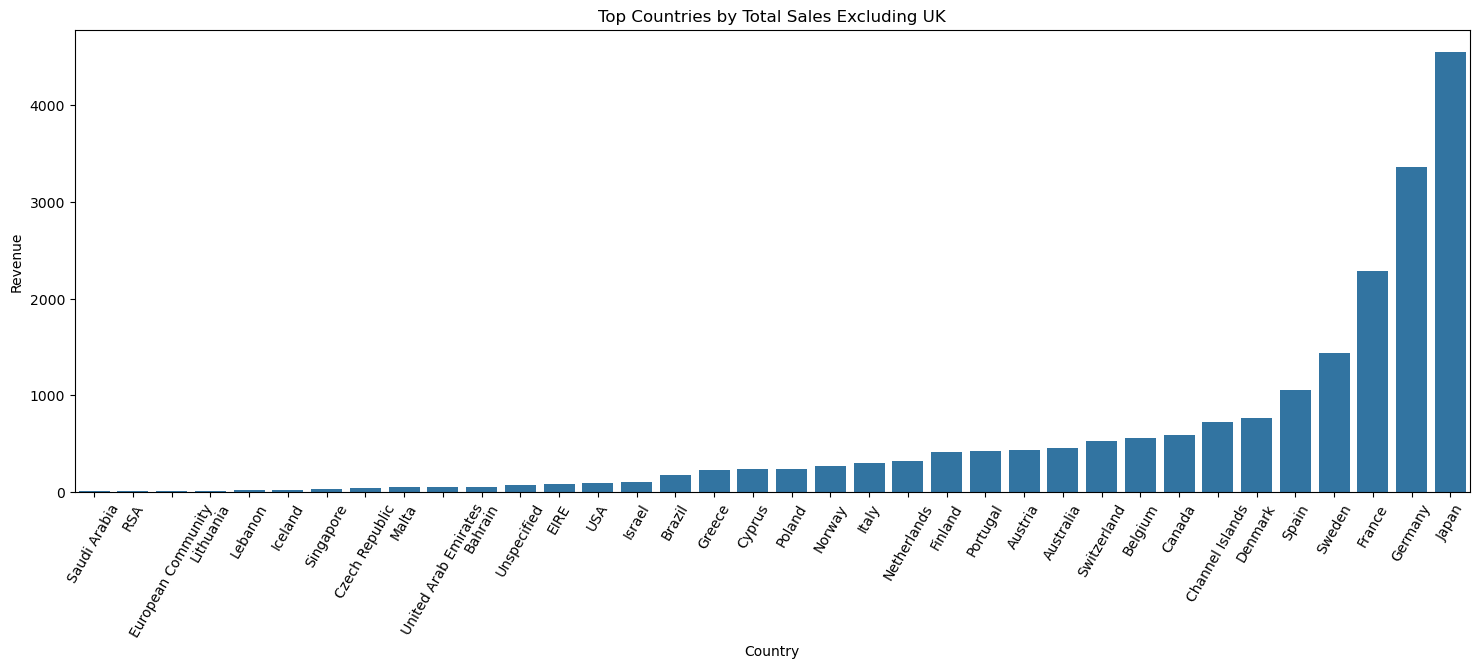

Number of Countrys = 37


In [159]:
top_countries = df.groupby('Country')['Revenue'].sum().sort_values(ascending=True).head(-1)
plt.figure(figsize=(18, 6))
sns.barplot(x=top_countries.index, y=top_countries.values)
plt.title('Top Countries by Total Sales Excluding UK')
plt.xlabel('Country')
plt.ylabel('Revenue')
plt.xticks(rotation=60)
plt.show()
print('Number of Countrys =' , df['Country'].nunique())

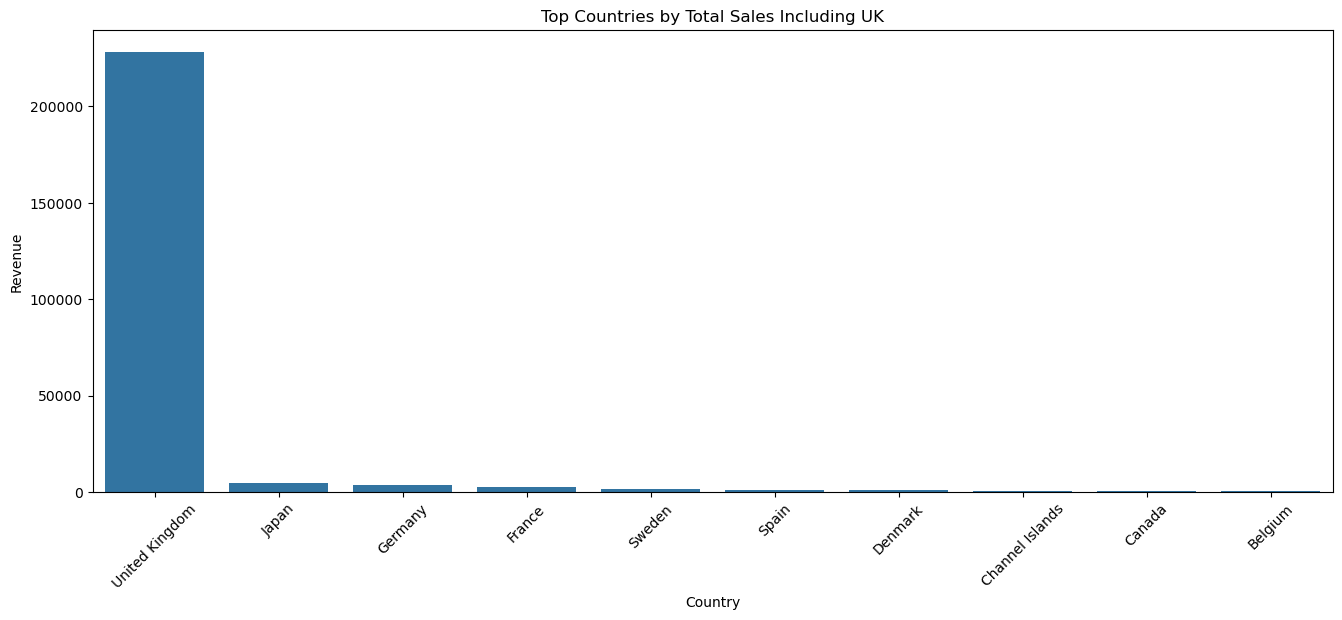

In [155]:
top_countries = df.groupby('Country')['Revenue'].sum().sort_values(ascending=False).head(10)
plt.figure(figsize=(16, 6))
sns.barplot(x=top_countries.index, y=top_countries.values)
plt.title('Top Countries by Total Sales Including UK')
plt.xlabel('Country')
plt.ylabel('Revenue')
plt.xticks(rotation=45)
plt.show()

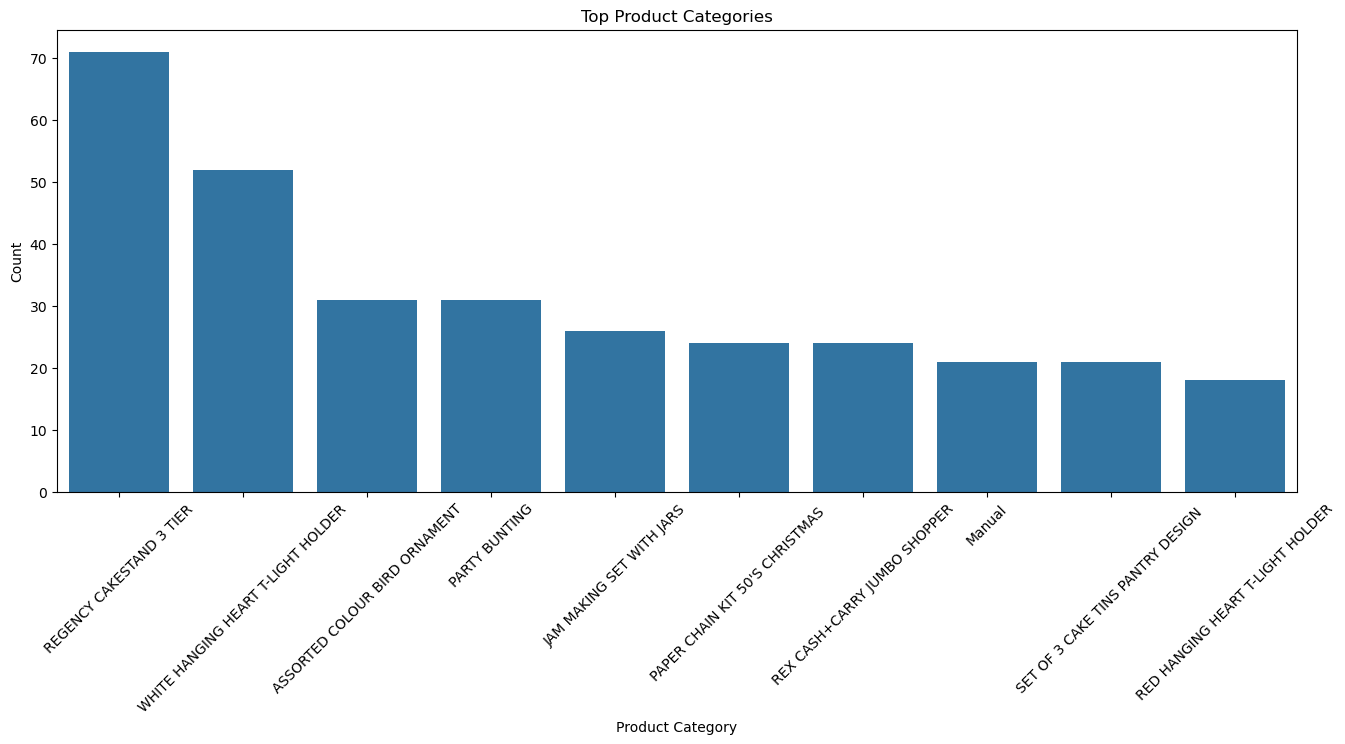

In [165]:
top_categories = df['Description'].value_counts().head(10)
plt.figure(figsize=(16, 6))
sns.barplot(x=top_categories.index, y=top_categories.values)
plt.title('Top Product Categories')
plt.xlabel('Product Category')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

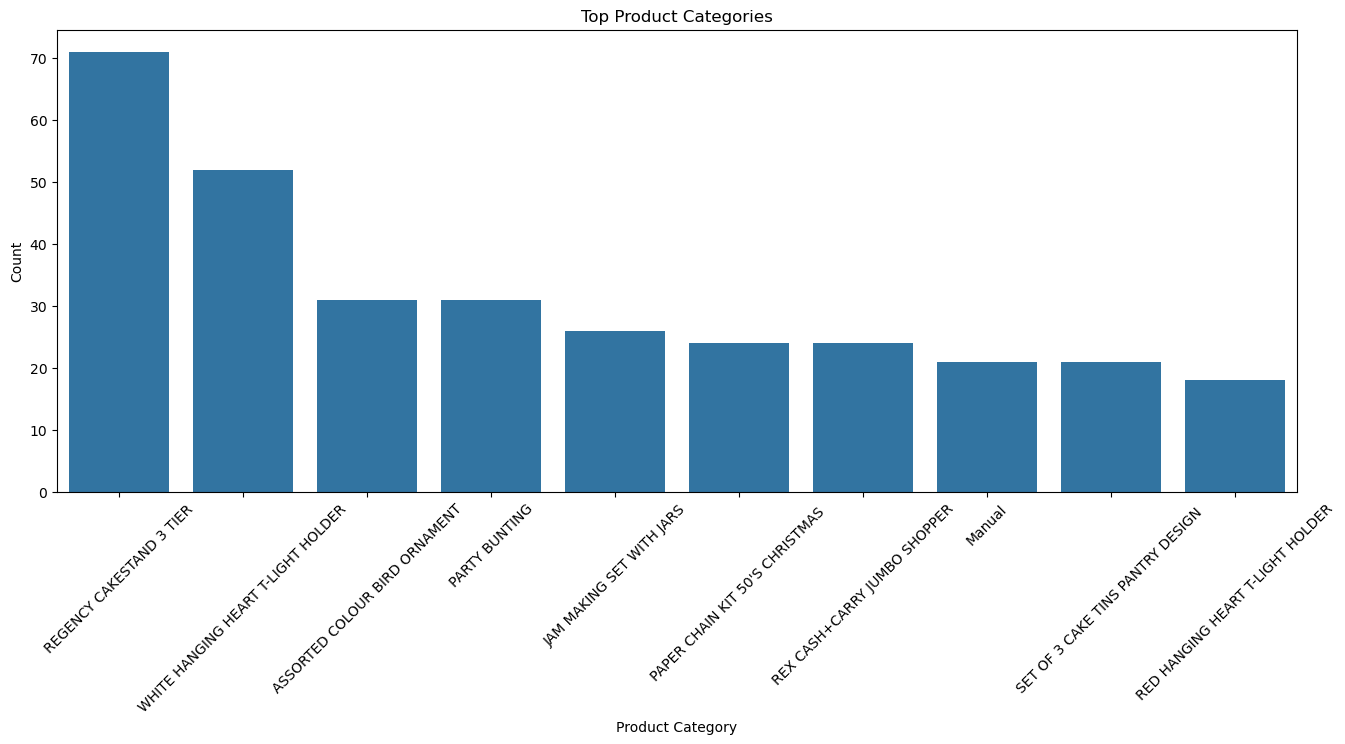

In [207]:
top_categories = df['Description'].value_counts().head(10)
plt.figure(figsize=(16, 6))
sns.barplot(x=top_categories.index, y=top_categories.values)
plt.title('Top Product Categories')
plt.xlabel('Product Category')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

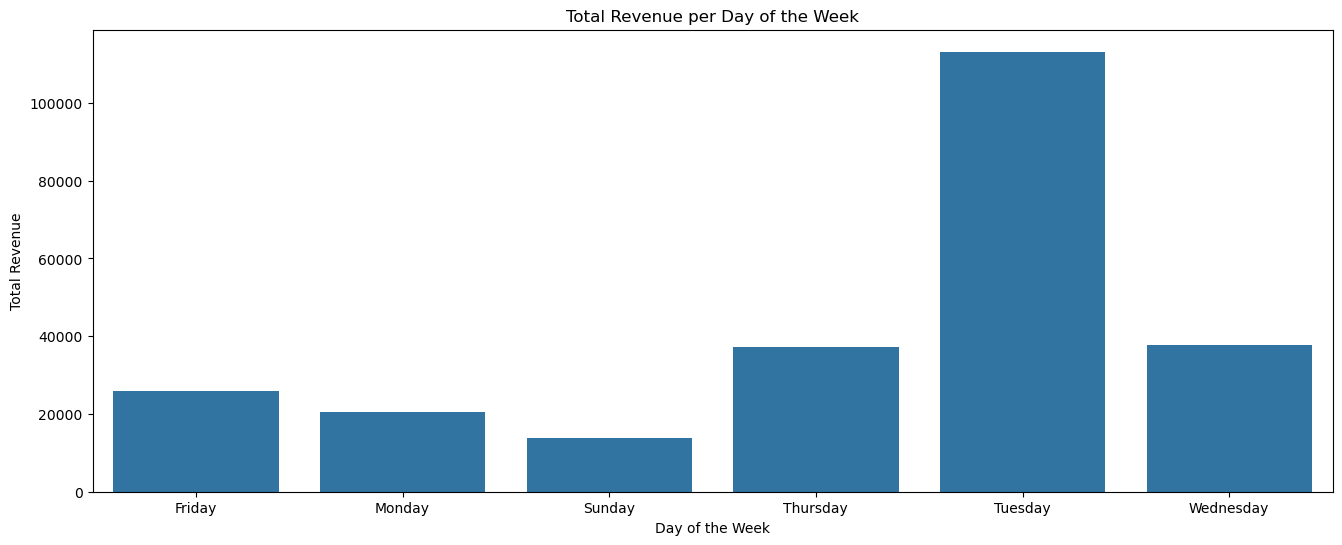

In [205]:
sales_by_day = df.groupby('DayOfWeek')['Revenue'].sum()
plt.figure(figsize=(16, 6))
sns.barplot(x=sales_by_day.index, y=sales_by_day.values)
plt.title('Total Revenue per Day of the Week')
plt.xlabel('Day of the Week')
plt.ylabel('Total Revenue')
plt.show()

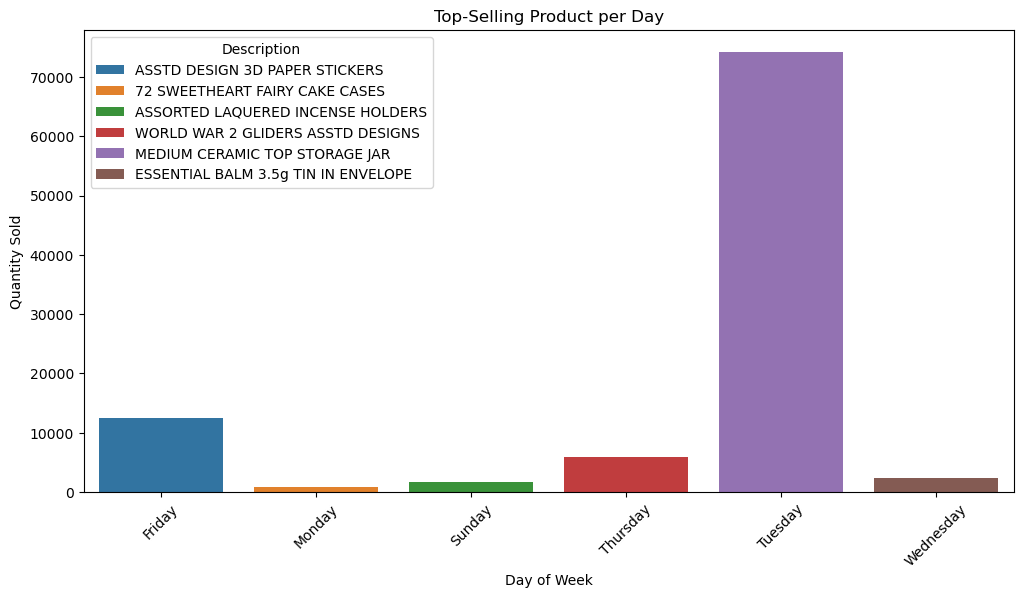

In [213]:
results = df.groupby(['DayOfWeek', 'Description'])['Quantity'].sum().reset_index()
top_products = results.sort_values('Quantity', ascending=False).groupby('DayOfWeek').first().reset_index()
plt.figure(figsize=(12,6))
sns.barplot(data=top_products, x='DayOfWeek', y='Quantity', hue='Description')
plt.title('Top-Selling Product per Day')
plt.ylabel('Quantity Sold')
plt.xlabel('Day of Week')
plt.xticks(rotation=45)
plt.show()

In [ ]:
top_product = df.groupby('Description')['Quantity'].sum().idxmax()
print("Top-selling product:", top_product)

Top-selling product: MEDIUM CERAMIC TOP STORAGE JAR


In [219]:
top_country = df[df['Description'] == top_product].groupby('Country')['Quantity'].sum().idxmax()
print("Country with highest sales for this product:", top_country)

Country with highest sales for this product: United Kingdom


In [241]:
df.to_csv('Cleann_Retail_Data.csv', index=False)